In [1]:
#This model is created to estimate the capacity of the Li-ion battery.
#Data used is the voltage, Current,Charge Capacity from 206 cycles data

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

                  #handling data
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
                 #scaling and splitting data
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
                #build and train model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import metrics
                #save and load the model
from tensorflow.keras.models import load_model
                #evaluate model
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score \

from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, GlobalMaxPooling2D, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model

import sys
sys.setrecursionlimit(10000)    #used to increase the recursion limit.



In [3]:
data = pd.ExcelFile("File Name or File Path")

In [ ]:
voltage = {}   #creating an empty dictionary to copy all the sheets of data.
for sheet in data.sheet_names:
    voltage[sheet] = pd.read_excel(data, sheet)  #all the sheets in the file "data" will be stored as items in this dictionary
    
copy = voltage.copy() #making a copy of this dictionary to use it later

#dividing total data in each sheet into 25 equal segments and adding an empty column "Capacity"
for sheet in voltage:
    x = ( round((len(voltage[sheet]))/25) )  
    voltage[sheet] = voltage[sheet][0::x]    #[start index : stop index : step size]
    voltage[sheet]['Capacity'] = ""
    
for sheet in voltage:    
    for sheet in copy:
        n = ( round((len(copy[sheet]))/25) )
        
        for k in range(0,25):
            p = (k+1)*(n)
#capacity = sum of all the current values in that segment as the time difference between each data sample in the segmnent is 1sec
#If time gap is more than 1sec, then capacity = sum of all the (I * T) in the segemnt 
            
            voltage[sheet]['Capacity'].iloc[k] = copy[sheet]['Current'].iloc[(k*n):(p)].sum()
            
for sheet in voltage: 
    voltage[sheet] = voltage[sheet].iloc[0:25] 
    

In [5]:
voltage['10']

,Current,Voltage-10,Capacity
0,1.398468,3.302002,432.306
309,1.399536,3.455200,432.487
618,1.399689,3.497620,432.433
927,1.399231,3.544922,432.301
1236,1.398926,3.589172,432.143
1545,1.398315,3.621216,431.992
1854,1.397705,3.649292,431.828
2163,1.397400,3.679199,431.728
2472,1.396942,3.708496,431.619
2781,1.396790,3.739014,431.595


In [6]:
for sheet in voltage:                 #converting all the sheets in voltage to arrays
    voltage[sheet] = voltage[sheet].to_numpy()

In [7]:
voltage

{'5': array([[1.398926, 3.284607, 432.455175],
        [1.400146, 3.452759, 432.796153],
        [1.401215, 3.494263, 433.089607],
        [1.401978, 3.541565, 433.25687500000004],
        [1.402283, 3.585815, 433.35049200000003],
        [1.402588, 3.618469, 433.402227],
        [1.40274, 3.647156, 433.4261419999999],
        [1.402588, 3.676453, 433.42964699999993],
        [1.40274, 3.706055, 433.41807299999994],
        [1.402435, 3.736267, 433.40924599999994],
        [1.402588, 3.766785, 433.40086899999994],
        [1.402435, 3.802795, 433.38774199999995],
        [1.402435, 3.845215, 433.3434820000001],
        [1.402283, 3.888855, 433.3093620000001],
        [1.40213, 3.930664, 433.26265099999995],
        [1.40213, 3.968201, 433.22440199999994],
        [1.401978, 4.001465, 433.21220600000004],
        [1.401978, 4.039001, 433.183355],
        [1.401825, 4.08905, 433.1500060000001],
        [1.401978, 4.145203, 433.14006700000004],
        [1.40152, 4.182434, 433.095067999999

In [8]:
for sheet in voltage:
    voltage[sheet] = np.expand_dims((voltage[sheet]), -1)
#expanding the dimension of  each input to make it a 3D input to CNN

In [9]:
voltage['5'].shape

(25, 3, 1)

In [10]:
"len() method :", len(voltage)

('len() method :', 206)

In [11]:
output = pd.read_excel("C:\\Users\\RECL\\Documents\\PRADYUMNA\\Experiment Data\\CNN\\CCCV Curves\\Capacity Output.xlsx", sheet_name= 'Sheet1')
output

,Capacity
0,99.287719
1,98.778947
2,98.498246
3,98.150877
4,97.915789
...,...
201,75.742181
202,75.373637
203,75.602828
204,76.032622


In [12]:
#converting all the arrays in the dictionary into a list "input". Input to the model can only be an array or a list of arrays.

input = np.empty((len(voltage.keys()), *voltage['5'].shape))

for i, k in enumerate(voltage.keys()):
    input[i] = voltage[k]

print(input.shape) 

(206, 25, 3, 1)


In [13]:
input

array([[[[1.39892600e+00],
         [3.28460700e+00],
         [4.32455175e+02]],

        [[1.40014600e+00],
         [3.45275900e+00],
         [4.32796153e+02]],

        [[1.40121500e+00],
         [3.49426300e+00],
         [4.33089607e+02]],

        ...,

        [[1.75659200e+00],
         [4.24865700e+00],
         [3.93546293e+02]],

        [[9.08203100e-01],
         [4.24896200e+00],
         [1.93309173e+02]],

        [[3.93371600e-01],
         [4.24835200e+00],
         [7.83901065e+01]]],


       [[[1.39846800e+00],
         [3.30200200e+00],
         [4.32305770e+02]],

        [[1.39953600e+00],
         [3.45520000e+00],
         [4.32487063e+02]],

        [[1.39968900e+00],
         [3.49762000e+00],
         [4.32432899e+02]],

        ...,

        [[1.50619500e+00],
         [4.24072300e+00],
         [3.55264746e+02]],

        [[8.39843800e-01],
         [4.24041700e+00],
         [1.80965119e+02]],

        [[3.73535200e-01],
         [4.23919700e+00],
   

In [14]:
np.shape(input)

(206, 25, 3, 1)

In [15]:
#splititng the data into training and validation
train_in, val_in, train_out, val_out = train_test_split(input, output, test_size=0.2, random_state=100)

In [16]:
train_in

array([[[[1.39770500e+00],
         [3.46588100e+00],
         [4.34878518e+02]],

        [[1.39877300e+00],
         [3.58276400e+00],
         [4.35147556e+02]],

        [[1.39938400e+00],
         [3.63678000e+00],
         [4.35301990e+02]],

        ...,

        [[2.61016800e-01],
         [4.24072300e+00],
         [7.35052953e+01]],

        [[2.12875400e-01],
         [4.24041700e+00],
         [6.01748808e+01]],

        [[1.74560500e-01],
         [4.23980700e+00],
         [5.01080774e+01]]],


       [[[1.40167200e+00],
         [3.43872100e+00],
         [4.23514406e+02]],

        [[1.40319800e+00],
         [3.53881800e+00],
         [4.23870853e+02]],

        [[1.40411400e+00],
         [3.59039300e+00],
         [4.24134090e+02]],

        ...,

        [[3.93219000e-01],
         [4.25445600e+00],
         [9.94193114e+01]],

        [[2.66906700e-01],
         [4.25293000e+00],
         [7.01811979e+01]],

        [[2.00180100e-01],
         [4.25262500e+00],
   

In [17]:
training_output

,Capacity
127,82.506194
85,87.157281
32,92.649633
174,77.777586
26,94.017544
...,...
87,87.203083
103,85.108683
67,88.900134
24,94.480702


In [18]:
rmse = tf.keras.metrics.RootMeanSquaredError()

In [ ]:
K = Input(shape=(25,3,1))

x = Conv2D(16,(2,2), strides=1, activation='relu', data_format='channels_last', padding='same')(K)   
x = BatchNormalization()(x)

x = Conv2D(32,(2,2), activation='relu', data_format='channels_last' , padding='same')(x)  
x = BatchNormalization()(x)

x = Flatten()(x)

x = Dense(320, activation='relu')(x)
x = Dense(160, activation='relu')(x)
x = Dense(80, activation='relu')(x)
x = Dense(1)(x)

model = Model(K,x)

model.compile(optimizer='adam',loss='mse', metrics=['mae', 'mape'])

#early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

model.fit(x=train_in, y=train_out,validation_data=(val_in,val_out),steps_per_epoch=None, epochs=220)
#, callbacks=[early_stop])

In [25]:
loss = pd.DataFrame(model.history.history)
loss.columns = ['Loss', 'MAE', 'MAPE%','Val_Loss', 'Val_MAE', 'Val_MAPE%']
loss

,Loss,MAE,MAPE%,Val_Loss,Val_MAE,Val_MAPE%
0,4188.227935,60.778030,70.571609,724.610904,26.406857,31.923380
1,813.908579,26.838165,31.552565,271.517128,16.241520,19.228022
2,305.570572,16.493326,19.259026,737.664716,27.084030,32.242939
3,79.658800,7.721125,8.954300,149.481325,12.109318,14.374390
4,67.620463,6.890116,7.894291,834.557518,28.758007,34.179523
...,...,...,...,...,...,...
215,0.210432,0.288458,0.331061,0.078422,0.199769,0.234374
216,0.168392,0.215515,0.247173,0.411216,0.575605,0.678910
217,0.281186,0.401609,0.462754,0.095458,0.194977,0.226828
218,0.268062,0.324826,0.369633,0.255370,0.460155,0.547824


Text(0, 0.5, 'Loss')

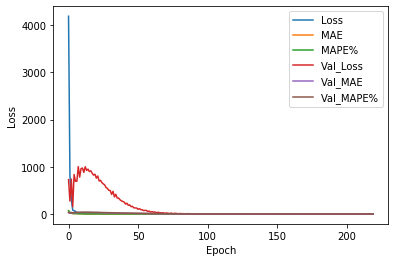

In [26]:
loss.plot()           #to plot the loss values
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [ ]:
keras.utils.plot_model(model, "123.png", show_shapes=True)

In [52]:
preddata = pd.ExcelFile("File Name or File Path")

In [ ]:
prediction = {}   #creating an empty dictionary to copy all the sheets of data.
for sheet in preddata.sheet_names:
    prediction[sheet] = pd.read_excel(preddata, sheet)  #all the sheets in the file "data" will be stored as items in this dictionary
    
pcopy = prediction.copy() #making a copy of this dictionary to use it later

#dividing total data in each sheet into 25 equal segments and adding an empty column "Capacity"
for sheet in prediction:
    x = ( round((len(prediction[sheet]))/25) )  
    prediction[sheet] = prediction[sheet][0::x]    #[start index : stop index : step size]
    prediction[sheet]['Capacity'] = ""
    
for sheet in prediction:    
    for sheet in pcopy:
        n = ( round((len(pcopy[sheet]))/25) )
        
        for k in range(0,25):
            p = (k+1)*(n)
#capacity = sum of all the current values in that segment as the time difference between each data sample in the segmnent is 1sec
#If time gap is more than 1sec, then capacity = sum of all the (I * T) in the segemnt 
            
            prediction[sheet]['Capacity'].iloc[k] = pcopy[sheet]['Current'].iloc[(k*n):(p)].sum()
            
for sheet in prediction: 
    prediction[sheet] = prediction[sheet].iloc[0:25] 
    

In [54]:
for sheet in prediction:                 #converting all the sheets in voltage to arrays
    prediction[sheet] = prediction[sheet].to_numpy()
    
for sheet in prediction:
    prediction[sheet] = np.expand_dims((prediction[sheet]), -1)
    


In [62]:
pred_in = np.empty((len(prediction.keys()), *prediction['1'].shape))

for i, k in enumerate(prediction.keys()):
    pred_in[i] = prediction[k]

print(pred_in.shape) 

(8, 25, 3, 1)


In [42]:
x

738

In [56]:
pred_out = pd.read_excel("C:\\Users\\RECL\\Documents\\PRADYUMNA\\Experiment Data\\CNN\\CCCV Curves\\Capacity-8cells.xlsx", sheet_name='Prediction',header=None)
pred_out = pred_out.drop(pred_out.index[0])
pred_out = pred_out.reset_index(drop=True)
pred_out

,0
0,98.1674
1,97.9086
2,98.1854
3,98.2956
4,98.2107
5,98.0689
6,98.3764
7,98.3703


In [63]:
predictions = model.predict(pred_in)

True_value = pd.DataFrame(pred_out)
True_value = True_value.reset_index(drop=True)
predected_value = pd.DataFrame(predictions)
Error = predected_value - True_value
Error = Error.abs()  # converts -ve numbers into +ve

compare = pd.concat([True_value,predected_value,Error],axis=1)
compare.columns = ['True_value','predected_value','Error']
Error.columns=['Error']


compare

,True_value,predected_value,Error
0,98.1674,96.130890,2.03648
1,97.9086,95.733582,2.17506
2,98.1854,95.888718,2.29667
3,98.2956,96.081955,2.21363
4,98.2107,95.844322,2.36636
5,98.0689,95.452003,2.61692
6,98.3764,96.122772,2.25366
7,98.3703,96.241043,2.12926


In [64]:
Error.max()  

Error    2.616917
dtype: float64

In [65]:
mean_absolute_error(pred_out,predictions)

2.2610038799465872

In [66]:
np.sqrt(mean_squared_error(pred_out,predictions))

2.266980554708179

In [67]:
#model.save('SoHCCCV.h5')